In [51]:
import pandas as pd

In [52]:
input_csv = 'csv/output_mapped.csv'
df = pd.read_csv(input_csv)
print(df.head())

   id                                               text  class
0   1  director operation , bpo executive summary res...      8
1   2  buyer summary 1 year end end experience worldw...      8
2   3  sr. workforce manager summary results-oriented...      8
3   4  risk specialist professional summary sale oper...      8
4   5  general manager board member executive profile...      8


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['class'], test_size=0.1, random_state=None)

print(f"Conjunto de treino: {len(X_train)} exemplos")
print(f"Conjunto de teste: {len(X_test)} exemplos")


Conjunto de treino: 2234 exemplos
Conjunto de teste: 249 exemplos


In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB

In [55]:
def train_naive_bayes(X_train, y_train, X_test):
    pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('clf', MultinomialNB())
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [56]:
def train_random_forest(X_train, y_train, X_test):
    pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('clf', RandomForestClassifier())
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [57]:
def train_bernoulli(X_train, y_train, X_test):
    pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('clf', BernoulliNB())
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [58]:
def train_logistic_regression(X_train, y_train, X_test):
    pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('clf', LogisticRegression(max_iter=1000))
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [59]:
def plot_accuracies(accuracies):
    models = list(accuracies.keys())
    acc_values = list(accuracies.values())
    plt.figure(figsize=(5, 5))
    plt.bar(models, acc_values, color=['blue', 'green', 'red'])
    plt.xlabel('Modelos')
    plt.ylabel('Acurácia')
    plt.title('Acurácia dos Modelos de Classificação')
    plt.ylim([0, 1]) 
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [60]:
nb_accuracy = train_naive_bayes(X_train, y_train, X_test)
rf_accuracy = train_random_forest(X_train, y_train, X_test)
lr_accuracy = train_logistic_regression(X_train, y_train, X_test)
br_accuracy = train_bernoulli(X_train, y_train, X_test)

accuracies = {
    'Naive Bayes': nb_accuracy,
    'Random Forest': rf_accuracy,
    'Logistic Regression': lr_accuracy,
    'Bernoulli': br_accuracy
}

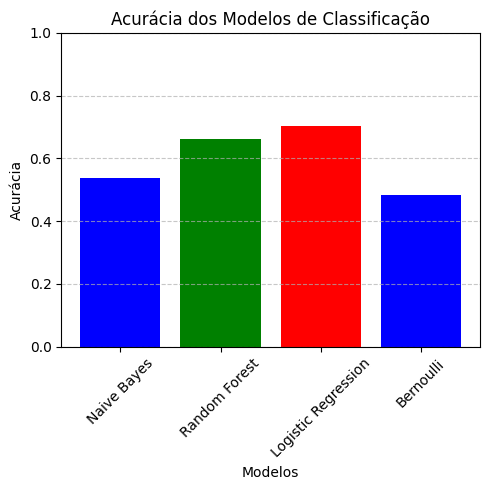

In [61]:
plot_accuracies(accuracies)